In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [31]:
data = pd.read_excel('iris.xls')

In [32]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
data.shape

(150, 5)

In [34]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Missing values

In [36]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [37]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [38]:
num_cols =data[['SL', 'SW', 'PL', 'PW']]

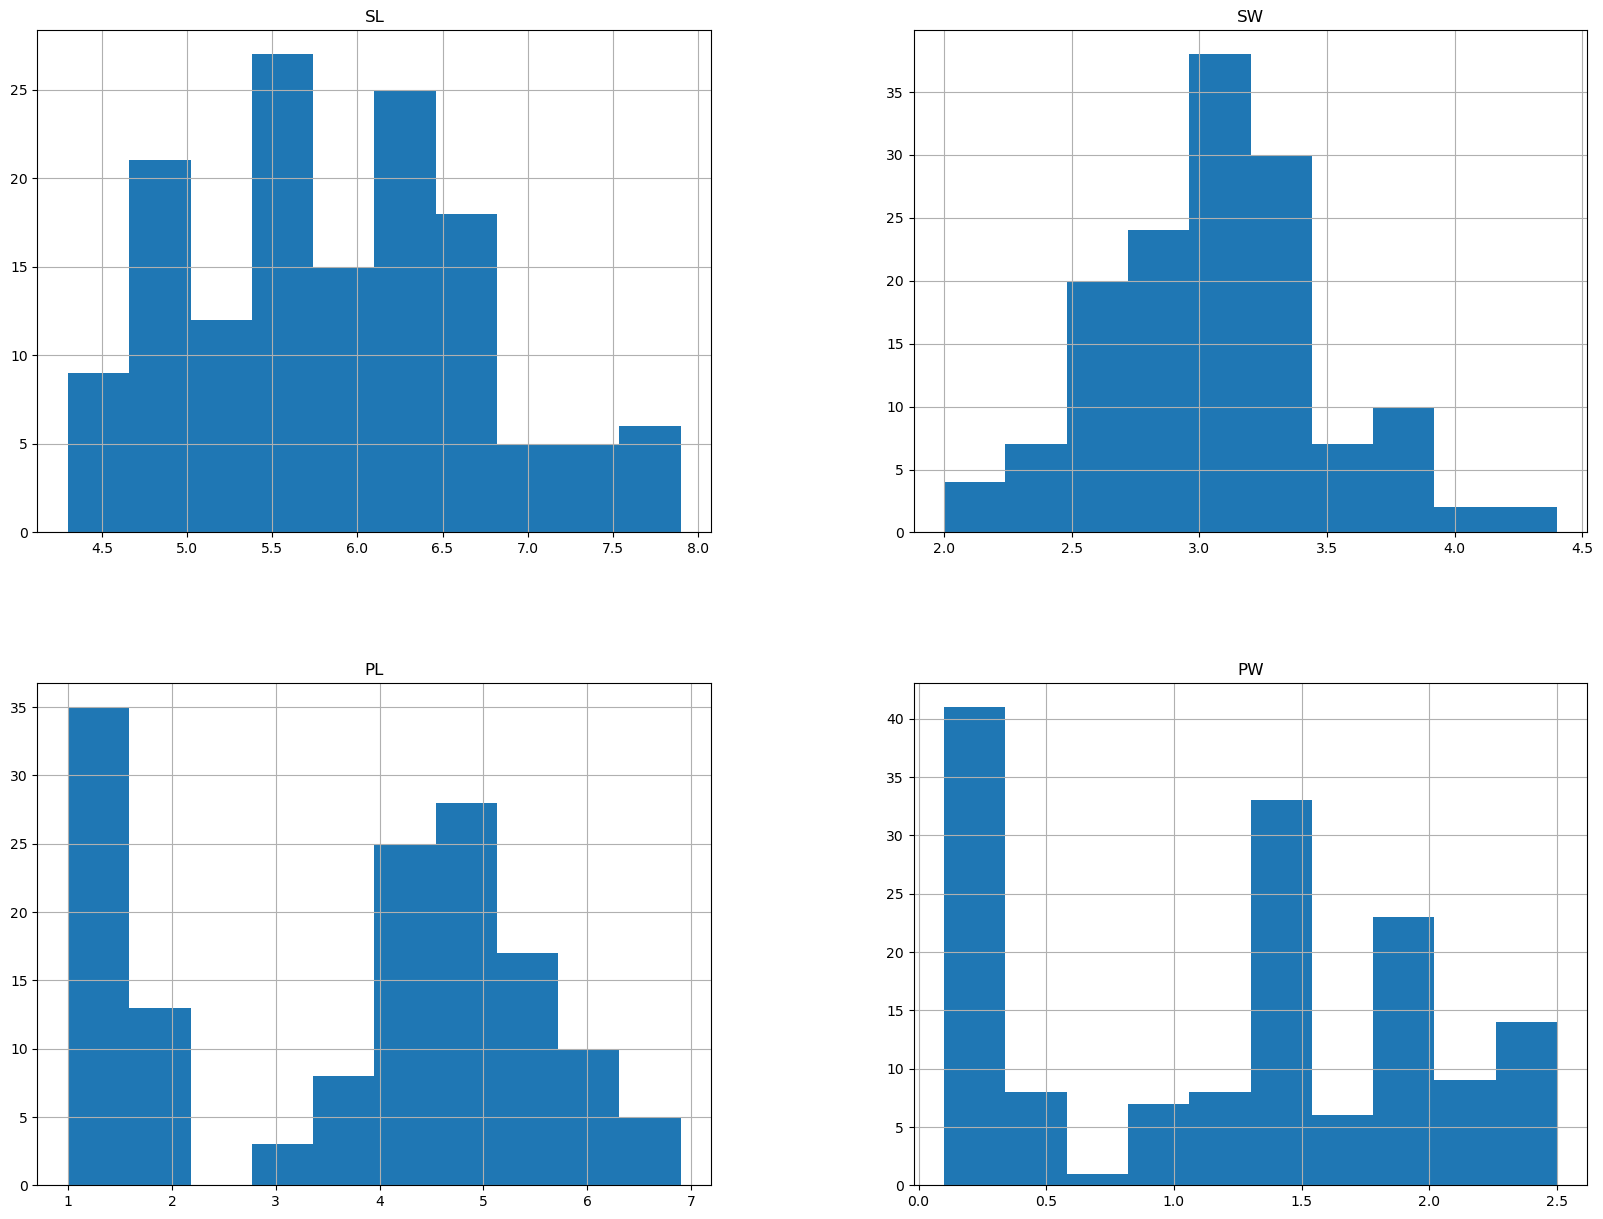

In [39]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [40]:
data['SL']= data['SL'].fillna(data['SL'].median())
data['SW']= data['SW'].fillna(data['SW'].median())
data['PL']= data['PL'].fillna(data['PL'].median())
data['PW']= data['PW'].fillna(data['PW'].median())

In [41]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
#Managing outlier

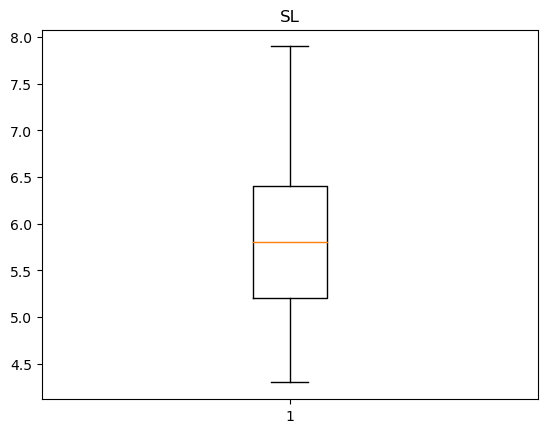

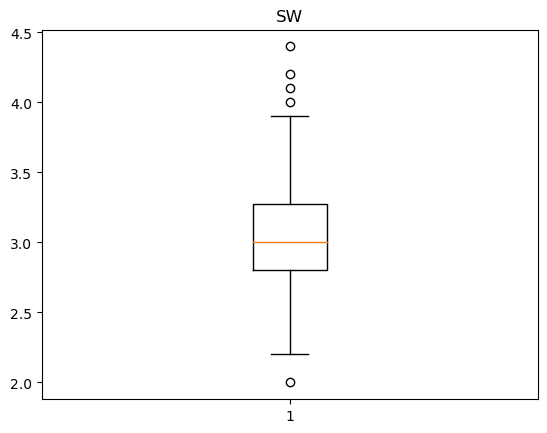

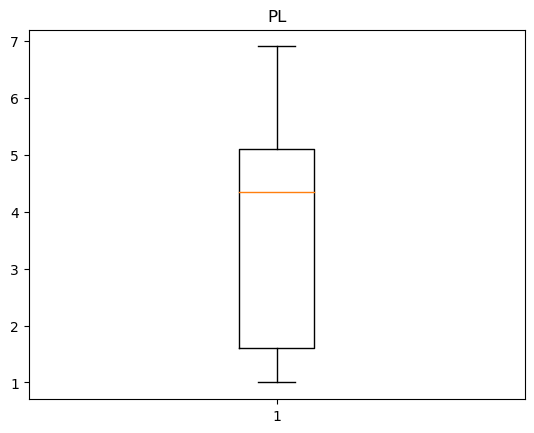

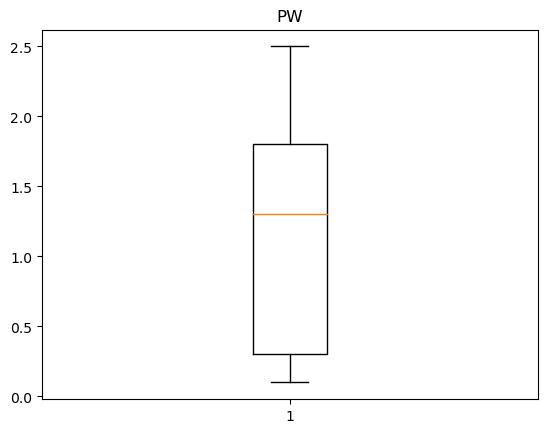

In [63]:
for i in ['SL', 'SW', 'PL', 'PW']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

# Logistic Regression

In [92]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train) 
pipe.score(x_test, y_test)

0.9666666666666667

In [103]:
y_pred = model.predict(x_test)

In [139]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred)*100)
print('Precision = ',precision_score(y_test,y_pred,pos_label='positive',average='micro')*100)
print('Recall = ',recall_score(y_test,y_pred, pos_label='positive', average='micro')*100)
print('fi score = ',f1_score(y_test,y_pred, pos_label='positive', average='micro')*100)

Accuracy =  100.0
Precision =  100.0
Recall =  100.0
fi score =  100.0


C:\Users\tompa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\tompa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\tompa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# KNN

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
metric_k =[]
neighbors = np.arange(2,10)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [128]:
metric_k

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

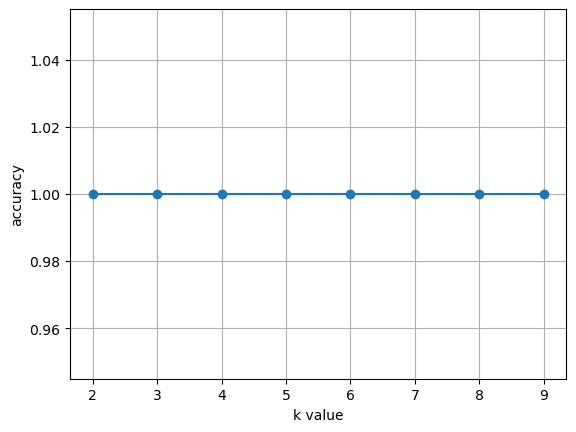

In [129]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [132]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc= accuracy_score(y_test,y_pred)
metric_k.append(acc)

In [133]:
metric_k

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [138]:
print('Accuracy = ',accuracy_score(y_test,y_pred)*100)
print('Precision = ',precision_score(y_test,y_pred,pos_label='positive',average='micro')*100)
print('Recall = ',recall_score(y_test,y_pred, pos_label='positive', average='micro')*100)
print('fi score = ',f1_score(y_test,y_pred, pos_label='positive', average='micro')*100)

Accuracy =  100.0
Precision =  100.0
Recall =  100.0
fi score =  100.0


C:\Users\tompa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\tompa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\tompa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [135]:
#Conclusion
#In both Logistic Regression and kNN method the Accuracy is 100%.